In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### Generate synthetic data (2 features for visualization)

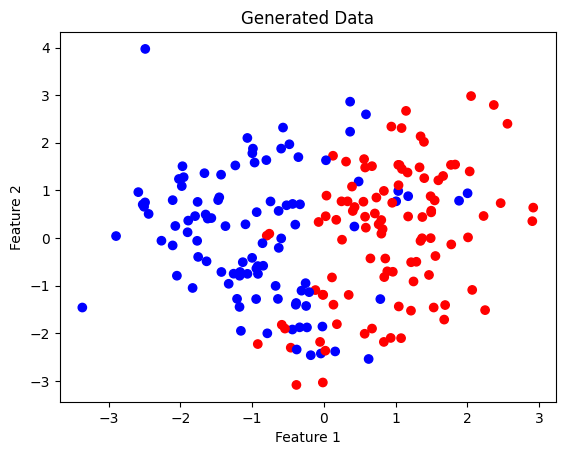

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, random_state=42)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Data")
plt.show()

### Sigmoid function

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Initialize parameters

In [4]:
m, n = X.shape
X_b = np.c_[np.ones((m, 1)), X]   # add bias column
theta = np.zeros((n+1, 1))        # weights (initialized to zero)
y = y.reshape(-1, 1)              # reshape y to column vector

### Define cost function (Log Loss)

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
    return cost[0, 0]

### Gradient Descent

In [6]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

### Train the model

In [7]:
theta_final, cost_history = gradient_descent(X_b, y, theta, alpha=0.1, iterations=1000)

print("Final Parameters (theta):", theta_final.ravel())
print("Final Cost:", cost_history[-1])

Final Parameters (theta): [-0.12400682  2.29040943 -0.28659314]
Final Cost: 0.34277601515337774


### Plot cost decrease

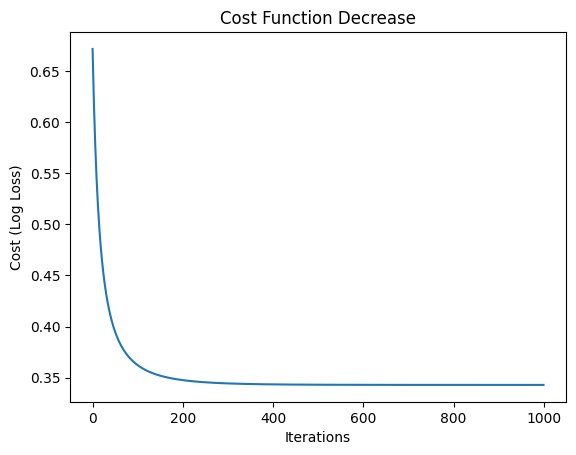

In [8]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (Log Loss)")
plt.title("Cost Function Decrease")
plt.show()

###  Predict function

In [9]:
def predict(X, theta):
    return (sigmoid(X.dot(theta)) >= 0.5).astype(int)

y_pred = predict(X_b, theta_final)

accuracy = np.mean(y_pred == y) * 100
print("Training Accuracy:", accuracy, "%")

Training Accuracy: 86.5 %


###  Decision Boundary

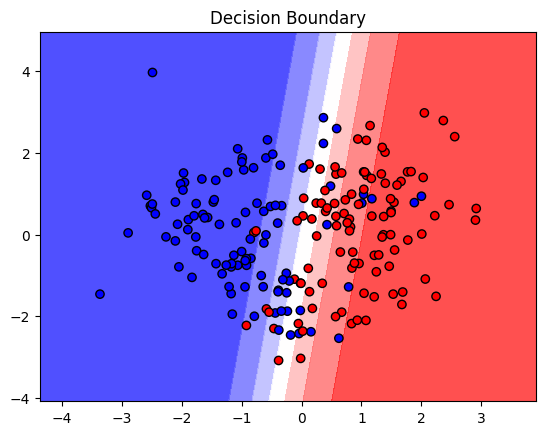

In [10]:
x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

X_grid = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()]
probs = sigmoid(X_grid.dot(theta_final)).reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k')
plt.title("Decision Boundary")
plt.show()

### Compare with Scikit-Learn LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y.ravel())

print("Sklearn Intercept:", clf.intercept_)
print("Sklearn Coefficients:", clf.coef_)
print("Sklearn Accuracy:", clf.score(X, y) * 100, "%")

Sklearn Intercept: [-0.10183668]
Sklearn Coefficients: [[ 2.09900303 -0.25113501]]
Sklearn Accuracy: 86.5 %
